In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

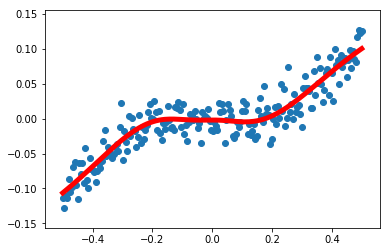

In [7]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.power(x_data, 3) + noise

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

Weight_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

Weight_L2 = tf.Variable(tf.random_normal([10, 10]))
biases_L2 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
L2 = tf.nn.tanh(Wx_plus_b_L2)

Weight_L3 = tf.Variable(tf.random_normal([10, 1]))
biases_L3 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L3 = tf.matmul(L2, Weight_L3) + biases_L3
L3 = tf.nn.tanh(Wx_plus_b_L3)

loss = tf.reduce_mean(tf.square(y - L3))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    prediction_value = sess.run(L3, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()
        